In [1]:
# Covid-vaccine uptake/ Vaccine hesitancy data
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# load data set
data= pd.read_excel("Covid Vaccine.xls")
data.head()

record_id redcap_survey_identifier    consent_timestamp       date consent  \
0          1                           2021-10-29 10:20:08 2021-10-29     Yes   
1          3                           2021-10-29 10:38:08 2021-10-29     Yes   
2          4                           2021-10-29 10:46:12 2021-10-29     Yes   
3          5                           2021-10-29 12:30:18 2021-10-29     Yes   
4          6                           2021-10-29 20:04:37 2021-10-29     Yes   

  consent_complete     survey_timestamp        studysite  gender   age  ...  \
0         Complete  2021-10-29 10:33:33  Avenue Hospital  Female  27.0  ...   
1         Complete  2021-10-29 10:44:21  Avenue Hospital  Female  27.0  ...   
2         Complete  2021-10-29 10:50:45  Avenue Hospital  Female  32.0  ...   
3         Complete  2021-10-29 12:36:17  Avenue Hospital  Female  29.0  ...   
4         Complete  2021-10-29 20:08:15  Avenue Hospital    Male  29.0  ...   

  social_media        hcp family_members government pharmaceutical  \
0    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
1    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
2    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
3    Unchecked  Unchecked      Unchecked  Unchecked      Unchecked   
4    Unchecked    Checked      Unchecked    Checked      Unchecked   

  scientific articles don't_trust survey_complete siteFinal VaccineStatus  
0           Unchecked   Unchecked        Complete         1             1  
1           Unchecked   Unchecked        Complete         1             1  
2           Unchecked   Unchecked        Complete         1             1  
3           Unchecked   Unchecked        Complete         1             1  
4           Unchecked   Unchecked        Complete         1             1  

[5 rows x 79 columns]

# Exploratory Data Analysis

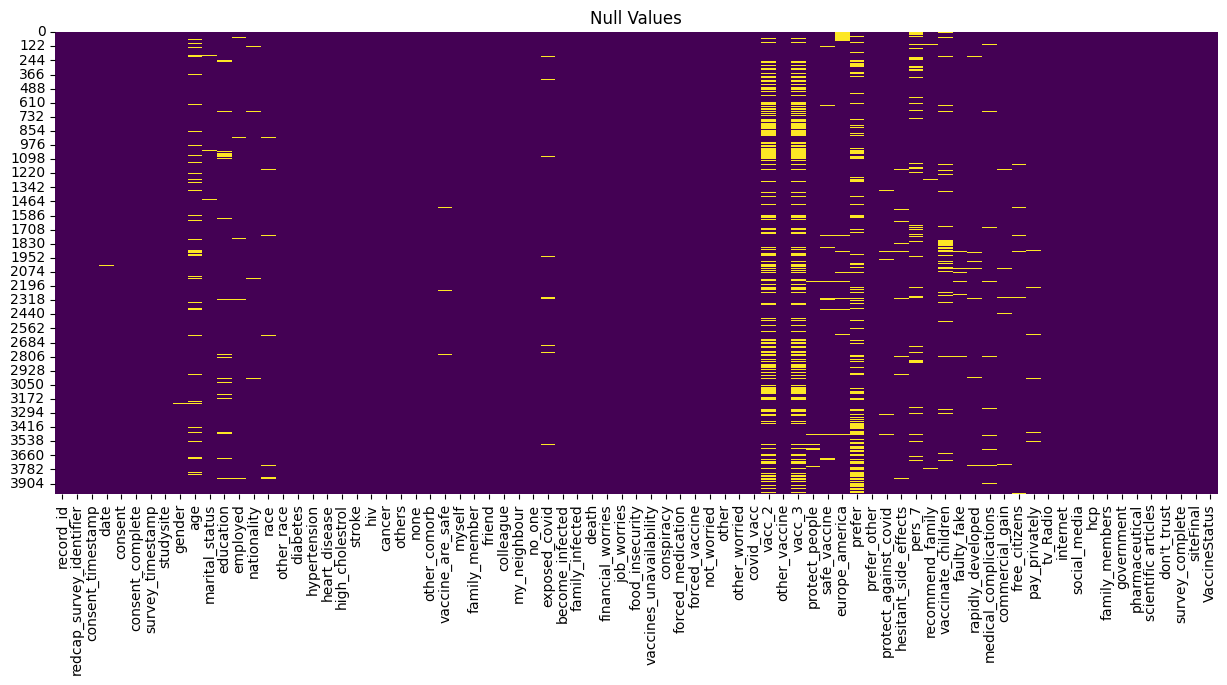

In [3]:
# Visualize null values
plt.figure(figsize=(15, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

plt.title('Null Values')
plt.show()

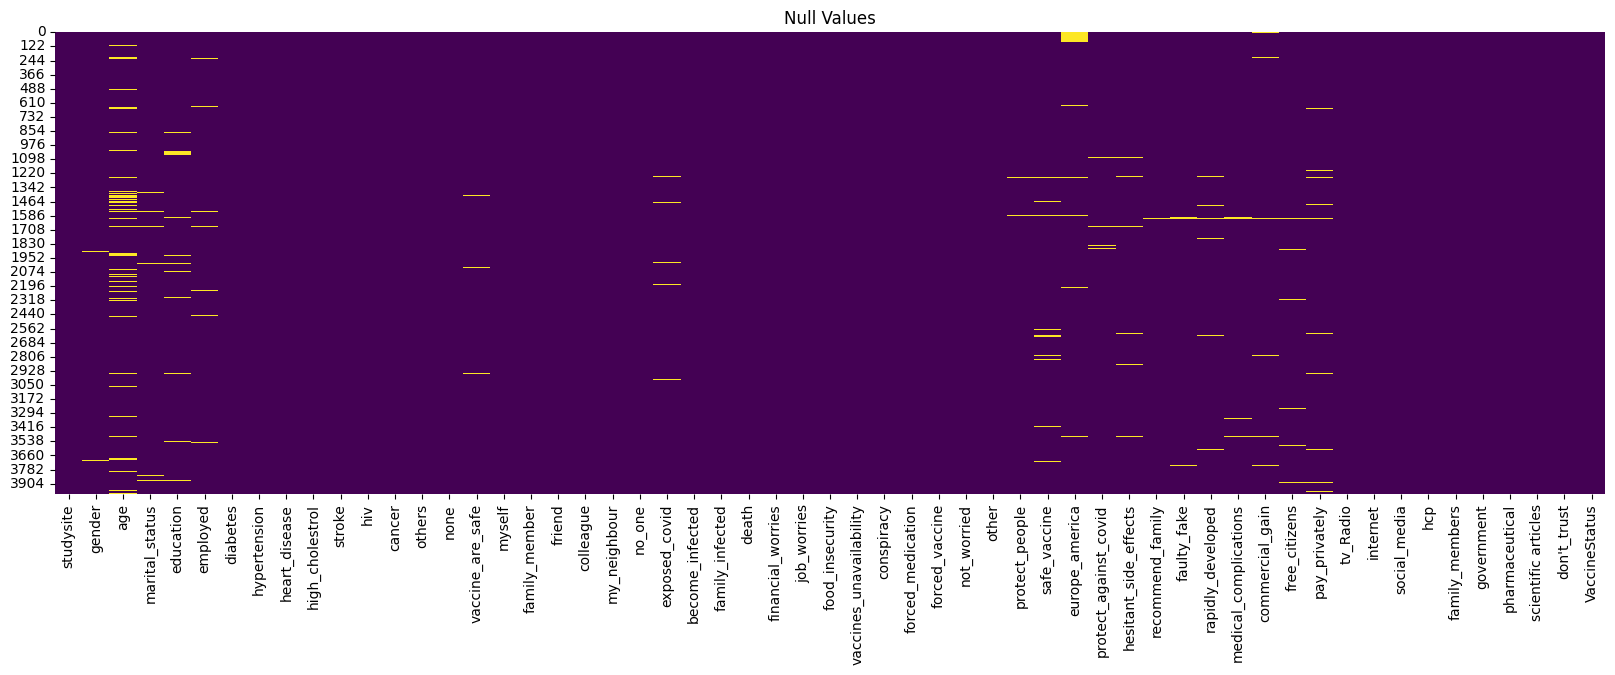

In [4]:
# drop columns on uptake of the vaccine
data_2 = data.drop(columns=['covid_vacc','other_vaccine','vacc_2','vacc_3','prefer','pers_7'])

# droppping more columns, record ids, question on race and vaccination in children
data_3 = data_2.drop(columns=['record_id','redcap_survey_identifier','consent_timestamp','date','consent','consent_complete','survey_timestamp',
                              'nationality','race','other_race','other_comorb','other_worried','prefer_other','vaccinate_children','survey_complete','siteFinal'])


plt.figure(figsize=(20, 6))
sns.heatmap(data_3.isnull(), cbar=False, cmap='viridis')

plt.title('Null Values')
plt.show()

In [5]:
# group hospital names/ study site into Public, Private, Faith Based
hospital_mapping = {
    'Aga Khan University, Nairobi':'private', 
    'Avenue Hospital':'private',
    'Mediheal Hospital':'private',
    'Penda Health':'private',
    'PCEA Hospital': 'faith',
    'Coast General Hospital': 'public'
}
data_3['studysite'] = data_3['studysite'].replace(hospital_mapping)
data_3.head(5)

studysite  gender   age marital_status      education  \
0   private  Female  27.0         Single  Undergraduate   
1   private  Female  27.0        Married        Diploma   
2   private  Female  32.0        Married        Diploma   
3   private  Female  29.0         Single        Diploma   
4   private    Male  29.0         Single  Undergraduate   

                   employed   diabetes hypertension heart_disease  \
0  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
1  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
2  Employed / Self Employed    Checked    Unchecked     Unchecked   
3  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
4  Employed / Self Employed  Unchecked    Unchecked     Unchecked   

  high_cholestrol  ...   tv_Radio   internet social_media        hcp  \
0       Unchecked  ...  Unchecked  Unchecked    Unchecked    Checked   
1       Unchecked  ...  Unchecked  Unchecked    Unchecked    Checked   
2       Unchecked  ...  Unchecked  Unchecked    Unchecked    Checked   
3       Unchecked  ...    Checked  Unchecked    Unchecked  Unchecked   
4       Unchecked  ...  Unchecked  Unchecked    Unchecked    Checked   

  family_members government pharmaceutical scientific articles don't_trust  \
0      Unchecked  Unchecked      Unchecked           Unchecked   Unchecked   
1      Unchecked  Unchecked      Unchecked           Unchecked   Unchecked   
2      Unchecked  Unchecked      Unchecked           Unchecked   Unchecked   
3      Unchecked  Unchecked      Unchecked           Unchecked   Unchecked   
4      Unchecked    Checked      Unchecked           Unchecked   Unchecked   

  VaccineStatus  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 57 columns]

In [6]:
# Change age variable from continuos to categorical variable
# Define bins and labels starting from 18-29 

bins = [18, 25, 35, 55]  
labels = [1, 2, 3]  


data_3['age_code'] = pd.cut(data_3['age'], bins=bins, labels=labels, right=False)

data_3 = data_3.drop(columns=['age'])

data_3.head(5)

studysite  gender marital_status      education                  employed  \
0   private  Female         Single  Undergraduate  Employed / Self Employed   
1   private  Female        Married        Diploma  Employed / Self Employed   
2   private  Female        Married        Diploma  Employed / Self Employed   
3   private  Female         Single        Diploma  Employed / Self Employed   
4   private    Male         Single  Undergraduate  Employed / Self Employed   

    diabetes hypertension heart_disease high_cholestrol     stroke  ...  \
0  Unchecked    Unchecked     Unchecked       Unchecked  Unchecked  ...   
1  Unchecked    Unchecked     Unchecked       Unchecked  Unchecked  ...   
2    Checked    Unchecked     Unchecked       Unchecked  Unchecked  ...   
3  Unchecked    Unchecked     Unchecked       Unchecked  Unchecked  ...   
4  Unchecked    Unchecked     Unchecked       Unchecked  Unchecked  ...   

    internet social_media        hcp family_members government pharmaceutical  \
0  Unchecked    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
1  Unchecked    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
2  Unchecked    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
3  Unchecked    Unchecked  Unchecked      Unchecked  Unchecked      Unchecked   
4  Unchecked    Unchecked    Checked      Unchecked    Checked      Unchecked   

  scientific articles don't_trust VaccineStatus age_code  
0           Unchecked   Unchecked             1        2  
1           Unchecked   Unchecked             1        2  
2           Unchecked   Unchecked             1        2  
3           Unchecked   Unchecked             1        2  
4           Unchecked   Unchecked             1        2  

[5 rows x 57 columns]

In [7]:
# change all columns to category data type
for column in data_3:
    data_3[column]=data_3[column].astype('category')

data_3.dtypes

studysite                  category
gender                     category
marital_status             category
education                  category
employed                   category
diabetes                   category
hypertension               category
heart_disease              category
high_cholestrol            category
stroke                     category
hiv                        category
cancer                     category
others                     category
none                       category
vaccine_are_safe           category
myself                     category
family_member              category
friend                     category
colleague                  category
my_neighbour               category
no_one                     category
exposed_covid              category
become_infected            category
family_infected            category
death                      category
financial_worries          category
job_worries                category
food_insecurity            c

In [143]:
## Set input and target variable
## split data

# Prepare input/target variables
input = data_3.drop(['VaccineStatus'], axis=1)
target = data_3['VaccineStatus']

from sklearn.model_selection import train_test_split
X = input
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [144]:
# All columns are categorical
categorical_cols = X.columns.tolist()

In [141]:
## Preprocess data

## 1. fill up null values with most frequent
## 2. ordinal encode


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Categorical pipeline: impute with mode + encode to integers
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [145]:
# Apply pipeline to all features
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_cols)
])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['studysite', 'gender', 'marital_status',
                                  'education', 'employed', 'diabetes',
                                  'hypertension', 'heart_disease',
                                  'high_cholestrol', 'stroke', 'hiv', 'cancer',
                                  'others', 'none', 'vaccine_are_safe',
                                  'myself', 'family_member', 'friend',
                                  'colleague', 'my_neighbour', 'no_one',
                                  'exposed_covid', 'become_infected',
                                  'family_infected', 'death',
                                  'financial_worries', 'job_worries',
                                  'food_insecurity', 'vaccines_unavailability',
                                  'conspiracy', ...])])

# DECISION TREE CLASSIFIER

In [37]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)


In [38]:
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', clf)
])

In [ ]:
# # predict on testing data
from sklearn.metrics import accuracy_score

y_text_pred = model_pipeline.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_text_pred)
print("Training Accuracy:", test_accuracy)


Training Accuracy: 0.7289407839866555


# RANDOM FOREST CLASSIFIER

In [146]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RF_clf = RandomForestClassifier(random_state=42)

In [147]:
# Full pipeline with RandomForest
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RF_clf)
])

In [148]:
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 5, 10]
}


In [129]:
rf_grid_search = GridSearchCV(
    model_pipeline, 
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2)

In [130]:
# Train
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['studysite',
                                                                          'gender',
                                                                          'marital_status',
                                                                          'education',
                                                                          'employed',
                                                                          'diabetes',
                                                                          'hypertension',
                                                                          'heart_disea...
                                                                          'job_worries',
                                                                          'food_insecurity',
                                                                          'vaccines_unavailability',
                                                                          'conspiracy', ...])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 5, 10],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [131]:
rf_model = rf_grid_search.best_estimator_ 

In [132]:
## predict on testing data

rf_pred = rf_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, rf_pred)
print("Training Accuracy:", test_accuracy)

# Training Accuracy: 0.7223404255319149

Training Accuracy: 0.8256880733944955


In [ ]:
## Run this to get the models average
from sklearn.metrics import accuracy_score

n_runs = 500
accuracies = []  # to store accuracy for each run

for run in range(n_runs):
    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    average_accuracy = sum(accuracies) / len(accuracies)
    

print(f"Average Accuracy over {n_runs} runs: {average_accuracy:.2f}")
# 0.83

Average Accuracy over 500 runs: 0.83


# SVM CLASSIFIER

In [164]:
# Different preprocessing for SVM
# We use onehotencoding
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [165]:
# Apply pipeline to all features
preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_cols)
])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['studysite', 'gender', 'marital_status',
                                  'education', 'employed', 'diabetes',
                                  'hypertension', 'heart_disease',
                                  'high_cholestrol', 'stroke', 'hiv', 'cancer',
                                  'others', 'none', 'vaccine_are_safe',
                                  'myself', 'family_member', 'friend',
                                  'colleague', 'my_neighbour', 'no_one',
                                  'exposed_covid', 'become_infected',
                                  'family_infected', 'death',
                                  'financial_worries', 'job_worries',
                                  'food_insecurity', 'vaccines_unavailability',
                                  'conspiracy', ...])])

In [166]:
from sklearn import svm
from sklearn.pipeline import Pipeline

svm_clf = svm.SVC(probability=True)

svm_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', svm_clf)
])


In [167]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['studysite',
                                                                          'gender',
                                                                          'marital_status',
                                                                          'education',
                                                                          'employed',
                                                                          'diabetes',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'high_cholestrol',
                                                                          'stroke...
                                                                          'my_neighbour',
                                                                          'no_one',
                                                                          'exposed_covid',
                                                                          'become_infected',
                                                                          'family_infected',
                                                                          'death',
                                                                          'financial_worries',
                                                                          'job_worries',
                                                                          'food_insecurity',
                                                                          'vaccines_unavailability',
                                                                          'conspiracy', ...])])),
                                       ('classifier', SVC(probability=True))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [168]:
svm_model = svm_grid_search.best_estimator_ 

In [169]:
## predict on testing data

y_test_pred = svm_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", test_accuracy)

# Training Accuracy: 0.823185988323603

Training Accuracy: 0.8306922435362802


In [170]:
n_runs = 500
svm_accuracies = []  # to store accuracy for each run

for run in range(n_runs):
    # Make predictions
    svm_y_pred = svm_model.predict(X_test)

    # Calculate and store the accuracy
    svm_accuracy = accuracy_score(y_test, svm_y_pred)
    svm_accuracies.append(svm_accuracy)

    svm_average_accuracy = sum(svm_accuracies) / len(svm_accuracies)
    
print(f"Average Accuracy over {n_runs} runs: {svm_average_accuracy:.2f}")


Average Accuracy over 500 runs: 0.83


# XGBOOST CLASSIFIER

In [59]:
from xgboost import XGBClassifier

In [60]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_cols)
])

In [61]:
xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

In [65]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.3]
}

xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [66]:
xgb_grid_search.fit(X_train, y_train)

print("Best parameters:", xgb_grid_search.best_params_)
print(f"Test accuracy: {xgb_grid_search.best_estimator_.score(X_test, y_test):.2f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Test accuracy: 0.83


c:\Users\david.andai\OneDrive - Aga Khan University\Documents\PROJECTS\Vaccine\Vaccine-MLOPS\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:30:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [67]:
xgb_model = xgb_grid_search.best_estimator_

In [93]:
## predict on testing data

y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", test_accuracy)

# Training Accuracy: 0.823185988323603

Training Accuracy: 0.8281901584653878


In [ ]:
## Optional
n_runs = 500
xgb_accuracies = []  # to store accuracy for each run

for run in range(n_runs):
    # Make predictions
    xgb_y_pred = xgb_model.predict(X_test)

    # Calculate and store the accuracy
    xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
    xgb_accuracies.append(xgb_accuracy)

    xgb_average_accuracy = sum(xgb_accuracies) / len(xgb_accuracies)

print(f"Average Accuracy over {n_runs} runs: {xgb_average_accuracy:.2f}")

Average Accuracy over 500 runs: 0.83


# Model Evaluation
The F1 score is particularly useful when you want to find a balance between precision and recall,as it considers both false positives and false negatives. It's a good metric to use when the class distribution is 
uneven or when you want to avoid overly optimistic or pessimistic evaluations of model performance.

In [104]:
from sklearn.metrics import f1_score
f1_rf = f1_score(y_test, y_pred, average='weighted')
f1_xgb = f1_score(y_test, xgb_y_pred, average='weighted')
f1_svm = f1_score(y_test, svm_y_pred, average='weighted')
print(f"RF F1 score {f1_rf:.2f}")
print(f"XGB F1 score {f1_xgb:.2f}")
print(f"SVM F1 score {f1_svm:.2f}")


RF F1 score 0.82
XGB F1 score 0.83
SVM F1 score 0.82


# Recall score
It measures the ability of the model to correctly identify positive instances out of all actual positive instances.

In [110]:

from sklearn.metrics import recall_score

sensitivity = recall_score(y_test, rf_pred)
sensitivity_svm = recall_score(y_test, svm_y_pred)
sensitivity_xgb = recall_score(y_test, xgb_y_pred)

print("RF Sensitivity (Recall):", sensitivity)
print("SVM Sensitivity (Recall):", sensitivity_svm)
print("XGB Sensitivity (Recall):", sensitivity_xgb)

RF Sensitivity (Recall): 0.9258809234507898
SVM Sensitivity (Recall): 0.8857837181044957
XGB Sensitivity (Recall): 0.8991494532199271


In [115]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_true and y_pred are the true and predicted labels
cm = confusion_matrix(y_test, rf_pred)

specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print(classification_report(y_test, rf_pred))
print("\nSpecificity:", specificity)


              precision    recall  f1-score   support

           0       0.79      0.61      0.69       376
           1       0.84      0.93      0.88       823

    accuracy                           0.83      1199
   macro avg       0.81      0.77      0.78      1199
weighted avg       0.82      0.83      0.82      1199


Specificity: 0.6063829787234043


# ROC
Receiver Operating Characteristic  
To understand ROC, we first start with defining sensitivity and specificty.  
- sensitivity: the proportion of people who actually have a target disease that are tested positive  
- specificity: the proportion of people who do not have a target disease that are tested negative. 

The ROC curve is an analytical method, represented as a graph, that is used to evaluate the performance of a binary diagnostic classification method.  
The ROC curve connects the coordinate points using “1 – specificity (false positive rate)” as the x-axis and “sensitivity” as the y-axis for all cut-off values measured from the test results. The stricter the criteria for determining a positive result, the more points on the curve shift downward and to the left. In contrast, if a loose criterion is applied, the point on the curve moves upward and to the right.  

## AUC
Area Under the Curve  
AUC is widely used to measure the accuracy of diagnostic tests. 
The ideal ROC curve thus has an AUC = 1.0. However, when the coordinates of the x-axis (1 – specificity) and the y-axis correspond to 1 : 1 (i.e., true positive rate = false positive rate), a graph is drawn on the 45° diagonal (y = x) of the ROC curve (AUC = 0.5).

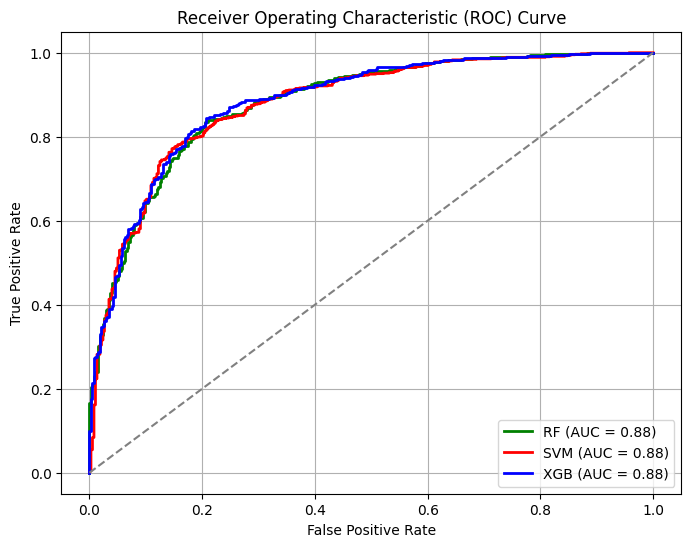

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC & AUC for the 3 models
models = [rf_model, svm_model, xgb_model]
names = ['RF', 'SVM', 'XGB']
colors = ['green', 'red', 'blue']

plt.figure(figsize=(8, 6))


for i, model in enumerate (models):
    
    predicted_probabilities = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    
    fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)

    # Calculate AUC
    auc = roc_auc_score(y_test, predicted_probabilities)
    
    # Plot ROC curve for the current model
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{names[i]} (AUC = %0.2f)' % auc)

# Plot the random classifier line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Random Forest Feature Importances


 Feature importance plots offer a more comprehensive view by considering both linear and non-linear relationships, as well as interactions between features, in the context of predictive modeling.  
 Correlation plots provide insights into linear relationships between features and the outcome variable.

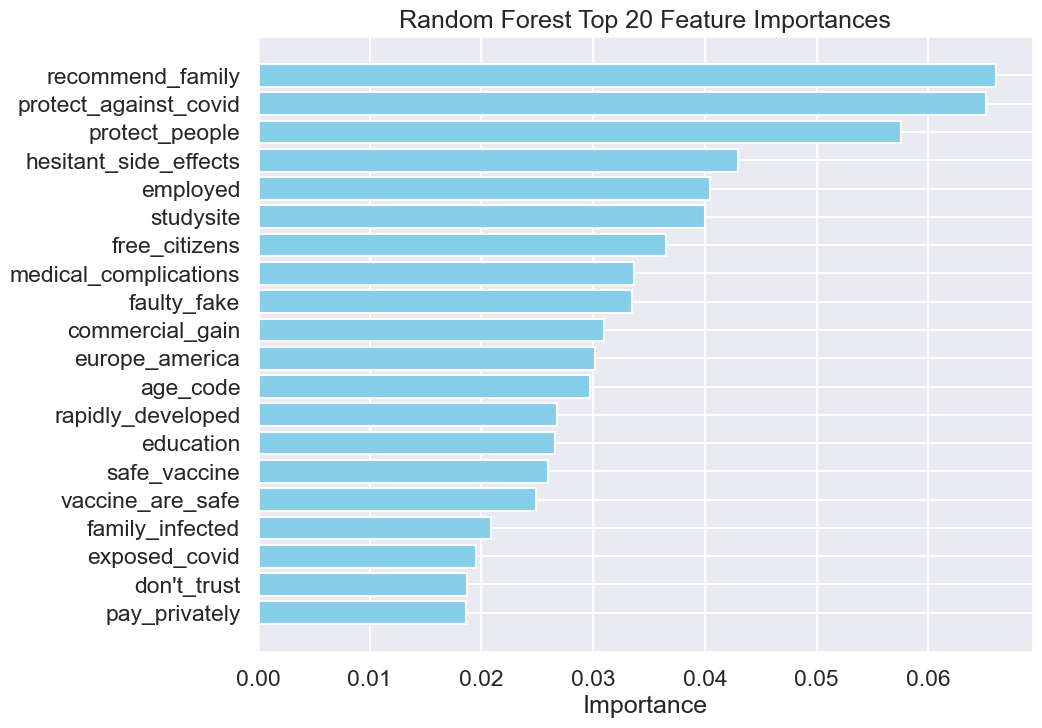

<Figure size 640x480 with 0 Axes>

In [60]:
random_features = X.columns
forest_importance = RF_clf.feature_importances_

# Combine the importances and names into a list of tuples and sort them by importance
random_importance = sorted(zip(forest_importance, random_features), key=lambda x: x[0])

# Select the top 20 features (or all features if there are fewer than 20)
top_20_features = random_importance[-20:]

# Separate the importances and names into two lists
top_20_importances, top_20_names = zip(*top_20_features)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(20), top_20_importances, align='center', color='skyblue')
plt.yticks(range(20), top_20_names)
plt.xlabel('Importance')
plt.title('Random Forest Top 20 Feature Importances')
plt.show()
plt.savefig("RF Feature Importance")

The permutation-based feature importance is more agnostic, and it assesses how a feature affects the model’s predictive performance. it involves a randomly shuffling values of a single feature and then measure the reduction in model performance criterion. The greater the reduction is, the more important the feature is.

In [30]:
from sklearn.feature_selection import SelectFromModel

select_features = SelectFromModel(RF_clf)
select_features.get_support()

array([ True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True])

In [31]:
selected_feat= X_train.columns[(select_features.get_support())]
print(selected_feat)

Index(['studysite', 'education', 'employed', 'vaccine_are_safe',
       'exposed_covid', 'family_infected', 'protect_people', 'safe_vaccine',
       'europe_america', 'protect_against_covid', 'hesitant_side_effects',
       'recommend_family', 'faulty_fake', 'rapidly_developed',
       'medical_complications', 'commercial_gain', 'free_citizens',
       'pay_privately', 'don't_trust', 'age_code'],
      dtype='object')


Categorical data is a tricky area for implementations like sklearn in python. Such data must first be converted into numerical input, and you can do this in two ways:
Given n categorical levels, create a new feature taking values  
0,1,…,n−1
This method has the **disadvantage of enforcing artificial relationships between the levels.**  

Given n categorical levels, create n-1 or n dummy variables, each one being a binary indicator of one of the levels. This eliminates the drawback of imposing relationships between the categorical levels, **but is also dilutes the strength of the feature**. A RF at each split point looks for the most predictive feature, but if you've changed a column into 5 or 10 of them, the power of each new dummy column individually is diminished, so perhaps the original feature never gets to speak.

# Let's look at permutation importance in Random Forest

In [120]:
## Permutation Importance
from sklearn.inspection import permutation_importance

rf_perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=30, n_jobs=-1)

In [121]:
rf_features = X.columns
# Combine the importances and names into a list of tuples and sort them by importance
rf_importance = sorted(zip(rf_perm_importance.importances_mean, rf_features), key=lambda x: x[0])

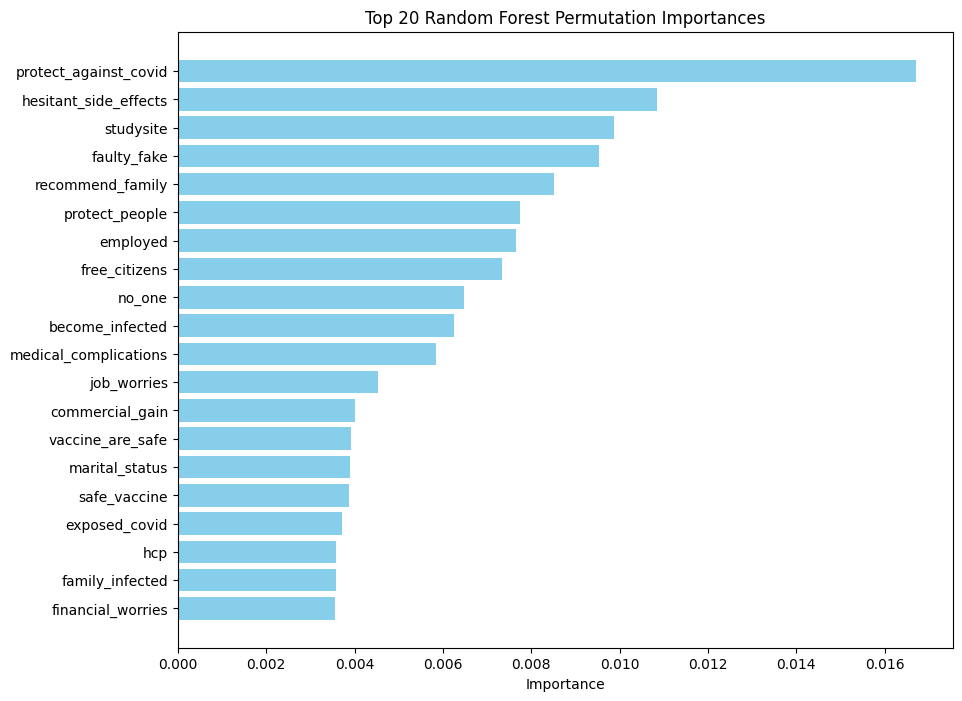

In [122]:
# Select the top 20 features (or all features if there are fewer than 20)
top_20_features = rf_importance[-20:]

# Separate the importances and names into two lists
top_20_importances, top_20_names = zip(*top_20_features)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(20), top_20_importances, align='center', color='skyblue')
plt.yticks(range(20), top_20_names)
plt.xlabel('Importance')
plt.title('Top 20 Random Forest Permutation Importances')
plt.show()

# Partial Dependancy Plots  
Useful tool for gaining insights into the relationship between features and predictions. It helps us understand how different values of a particular feature impact model’s predictions.

In [161]:
X_train

studysite  gender marital_status         education  \
1486   private    Male         Single     Undergraduate   
2880     faith    Male         Single           Diploma   
2542   private    Male         Single     Undergraduate   
1971   private  Female        Married  School Education   
3042     faith    Male         Single     Undergraduate   
...        ...     ...            ...               ...   
1552   private    Male         Single      Postgraduate   
778    private  Female        Married           Diploma   
2206   private  Female         Single     Undergraduate   
1257   private  Female        Married           Diploma   
1975   private  Female        Married     Undergraduate   

                      employed   diabetes hypertension heart_disease  \
1486  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
2880  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
2542  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
1971  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
3042                Unemployed  Unchecked    Unchecked     Unchecked   
...                        ...        ...          ...           ...   
1552  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
778   Employed / Self Employed  Unchecked    Unchecked     Unchecked   
2206  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
1257  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
1975  Employed / Self Employed  Unchecked    Unchecked     Unchecked   

     high_cholestrol     stroke  ...   tv_Radio   internet social_media  \
1486       Unchecked  Unchecked  ...  Unchecked  Unchecked    Unchecked   
2880       Unchecked  Unchecked  ...    Checked    Checked    Unchecked   
2542       Unchecked  Unchecked  ...  Unchecked  Unchecked    Unchecked   
1971       Unchecked  Unchecked  ...  Unchecked  Unchecked    Unchecked   
3042       Unchecked  Unchecked  ...  Unchecked  Unchecked    Unchecked   
...              ...        ...  ...        ...        ...          ...   
1552       Unchecked  Unchecked  ...  Unchecked  Unchecked    Unchecked   
778        Unchecked  Unchecked  ...  Unchecked  Unchecked    Unchecked   
2206       Unchecked  Unchecked  ...  Unchecked  Unchecked    Unchecked   
1257       Unchecked  Unchecked  ...  Unchecked  Unchecked    Unchecked   
1975       Unchecked  Unchecked  ...  Unchecked  Unchecked    Unchecked   

            hcp family_members government pharmaceutical scientific articles  \
1486  Unchecked      Unchecked  Unchecked        Checked           Unchecked   
2880  Unchecked        Checked  Unchecked      Unchecked           Unchecked   
2542  Unchecked      Unchecked  Unchecked      Unchecked           Unchecked   
1971  Unchecked      Unchecked    Checked      Unchecked           Unchecked   
3042  Unchecked        Checked  Unchecked      Unchecked           Unchecked   
...         ...            ...        ...            ...                 ...   
1552  Unchecked      Unchecked  Unchecked      Unchecked           Unchecked   
778     Checked      Unchecked  Unchecked      Unchecked           Unchecked   
2206    Checked      Unchecked  Unchecked      Unchecked           Unchecked   
1257    Checked      Unchecked  Unchecked      Unchecked           Unchecked   
1975    Checked      Unchecked  Unchecked      Unchecked           Unchecked   

     don't_trust age_code  
1486   Unchecked        2  
2880   Unchecked        1  
2542     Checked        2  
1971   Unchecked        3  
3042   Unchecked        1  
...          ...      ...  
1552   Unchecked      NaN  
778    Unchecked        3  
2206   Unchecked        2  
1257   Unchecked        2  
1975   Unchecked        2  

[2797 rows x 56 columns]

In [152]:
X_transformed = model.named_steps['preprocessing'].transform(X_train)
X_transformed

array([[1., 1., 2., ..., 1., 1., 1.],
       [0., 1., 2., ..., 1., 1., 0.],
       [1., 1., 2., ..., 1., 0., 1.],
       ...,
       [1., 0., 2., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.]], shape=(2797, 56))

In [162]:
# Step 1: Map category labels to ordinal integers
label_order = ['strongly_disagree', 'disagree', 'neutral', 'agree', 'strongly_agree']
label_map = {label: i for i, label in enumerate(label_order)}

X_clean = X_train.copy()
col = 'protect_against_covid'

# Map only known values; missing stays as is or gets -1
X_clean[col] = X_clean[col].map(label_map).fillna(-1).astype(int)

# Fill NaNs first with a placeholder
X_clean[col] = X_clean[col].fillna('missing')


c:\Users\david.andai\OneDrive - Aga Khan University\Documents\PROJECTS\Vaccine\Vaccine-MLOPS\venv\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:976: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


([<matplotlib.axis.XTick at 0x27a226e3250>,
 [Text(0, 0, 'strongly_disagree'),
  Text(1, 0, 'disagree'),
  Text(2, 0, 'neutral'),
  Text(3, 0, 'agree'),
  Text(4, 0, 'strongly_agree')])

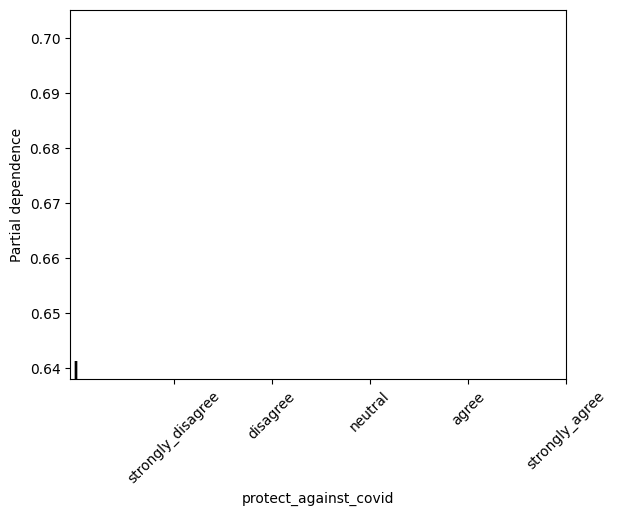

In [163]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay


PartialDependenceDisplay.from_estimator(
    rf_model,
    X_clean,
    features=[X_clean.columns.get_loc(col)],
    kind='average',
    grid_resolution=5
)

# Relabel ticks
import matplotlib.pyplot as plt
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=label_order, rotation=45)

Tp better understand PDPs, we take a deep dive and look into Individual Conditional Expectation plots (ICE)
- the next code chunk is on manual approach to plotting PDPs and ICE

In [36]:
values = X_train[var].sort_values().unique()
print(f"Unique values: {values}")

Unique values: [0 1 2 3 4]


In [37]:
individual = np.empty((len(X_train), len(values)))

for i, value in enumerate(values):
    X_copy = X_train.copy()
    X_copy[var] = value
    individual[:, i] = model.predict_proba(X_copy)[:, 1]
individual

array([[0.96421736, 0.93103659, 0.96596467, 0.99786866, 0.9355365 ],
       [0.97659886, 0.97290212, 0.96991658, 0.99644572, 0.98681527],
       [0.99172133, 0.97444236, 0.96285117, 0.91250873, 0.72531593],
       ...,
       [0.07914422, 0.02410397, 0.03239521, 0.07743952, 0.00806441],
       [0.99818218, 0.98464173, 0.98011577, 0.99960655, 0.98056281],
       [0.99827719, 0.99582666, 0.99582666, 0.99994886, 0.99587506]])

In [38]:
individual.mean(axis=0)

array([0.69573013, 0.60623405, 0.62185823, 0.71663054, 0.56353955])

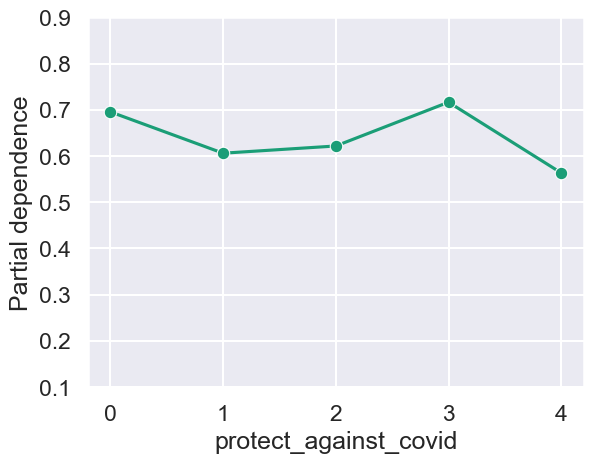

In [39]:
# Plotting PDPs from raw values
sns.lineplot(x=values, y=individual.mean(axis=0), style=0, markers=True, legend=False)
plt.ylim(0.1,0.9)
plt.ylabel("Partial dependence")
plt.xlabel(var);

In [40]:
raw_values = partial_dependence(RF_clf, X_train, var, kind='both')
raw_values

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


{'grid_values': [array([0, 1, 2, 3, 4])],
 'values': [array([0, 1, 2, 3, 4])],
 'average': array([[0.67561912, 0.60643666, 0.60229889, 0.70708736, 0.59888929]]),
 'individual': array([[[0.90333333, 0.88666667, 0.90333333, 0.99333333, 0.80666667],
         [0.97333333, 0.84333333, 0.83666667, 0.94666667, 0.82666667],
         [0.88      , 0.72      , 0.68666667, 0.69      , 0.65333333],
         ...,
         [0.36666667, 0.15666667, 0.15      , 0.32      , 0.23666667],
         [0.93333333, 0.87      , 0.84666667, 0.99666667, 0.79666667],
         [0.91      , 0.89666667, 0.89333333, 1.        , 0.85333333]]])}

In [41]:
print(np.array_equal(raw_values['individual'][0], individual))
print(np.isclose(raw_values['average'][0], 
                 np.mean(individual, axis=0)))

False
[False False False False False]


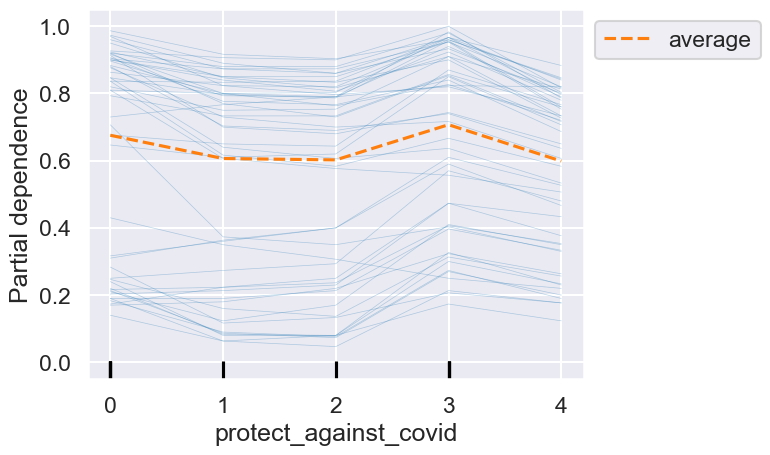

In [42]:
n = 50
PartialDependenceDisplay.from_estimator(RF_clf, X_train, ['protect_against_covid'], kind="both", n_jobs=3, subsample=n)
plt.legend(bbox_to_anchor=(1,1));

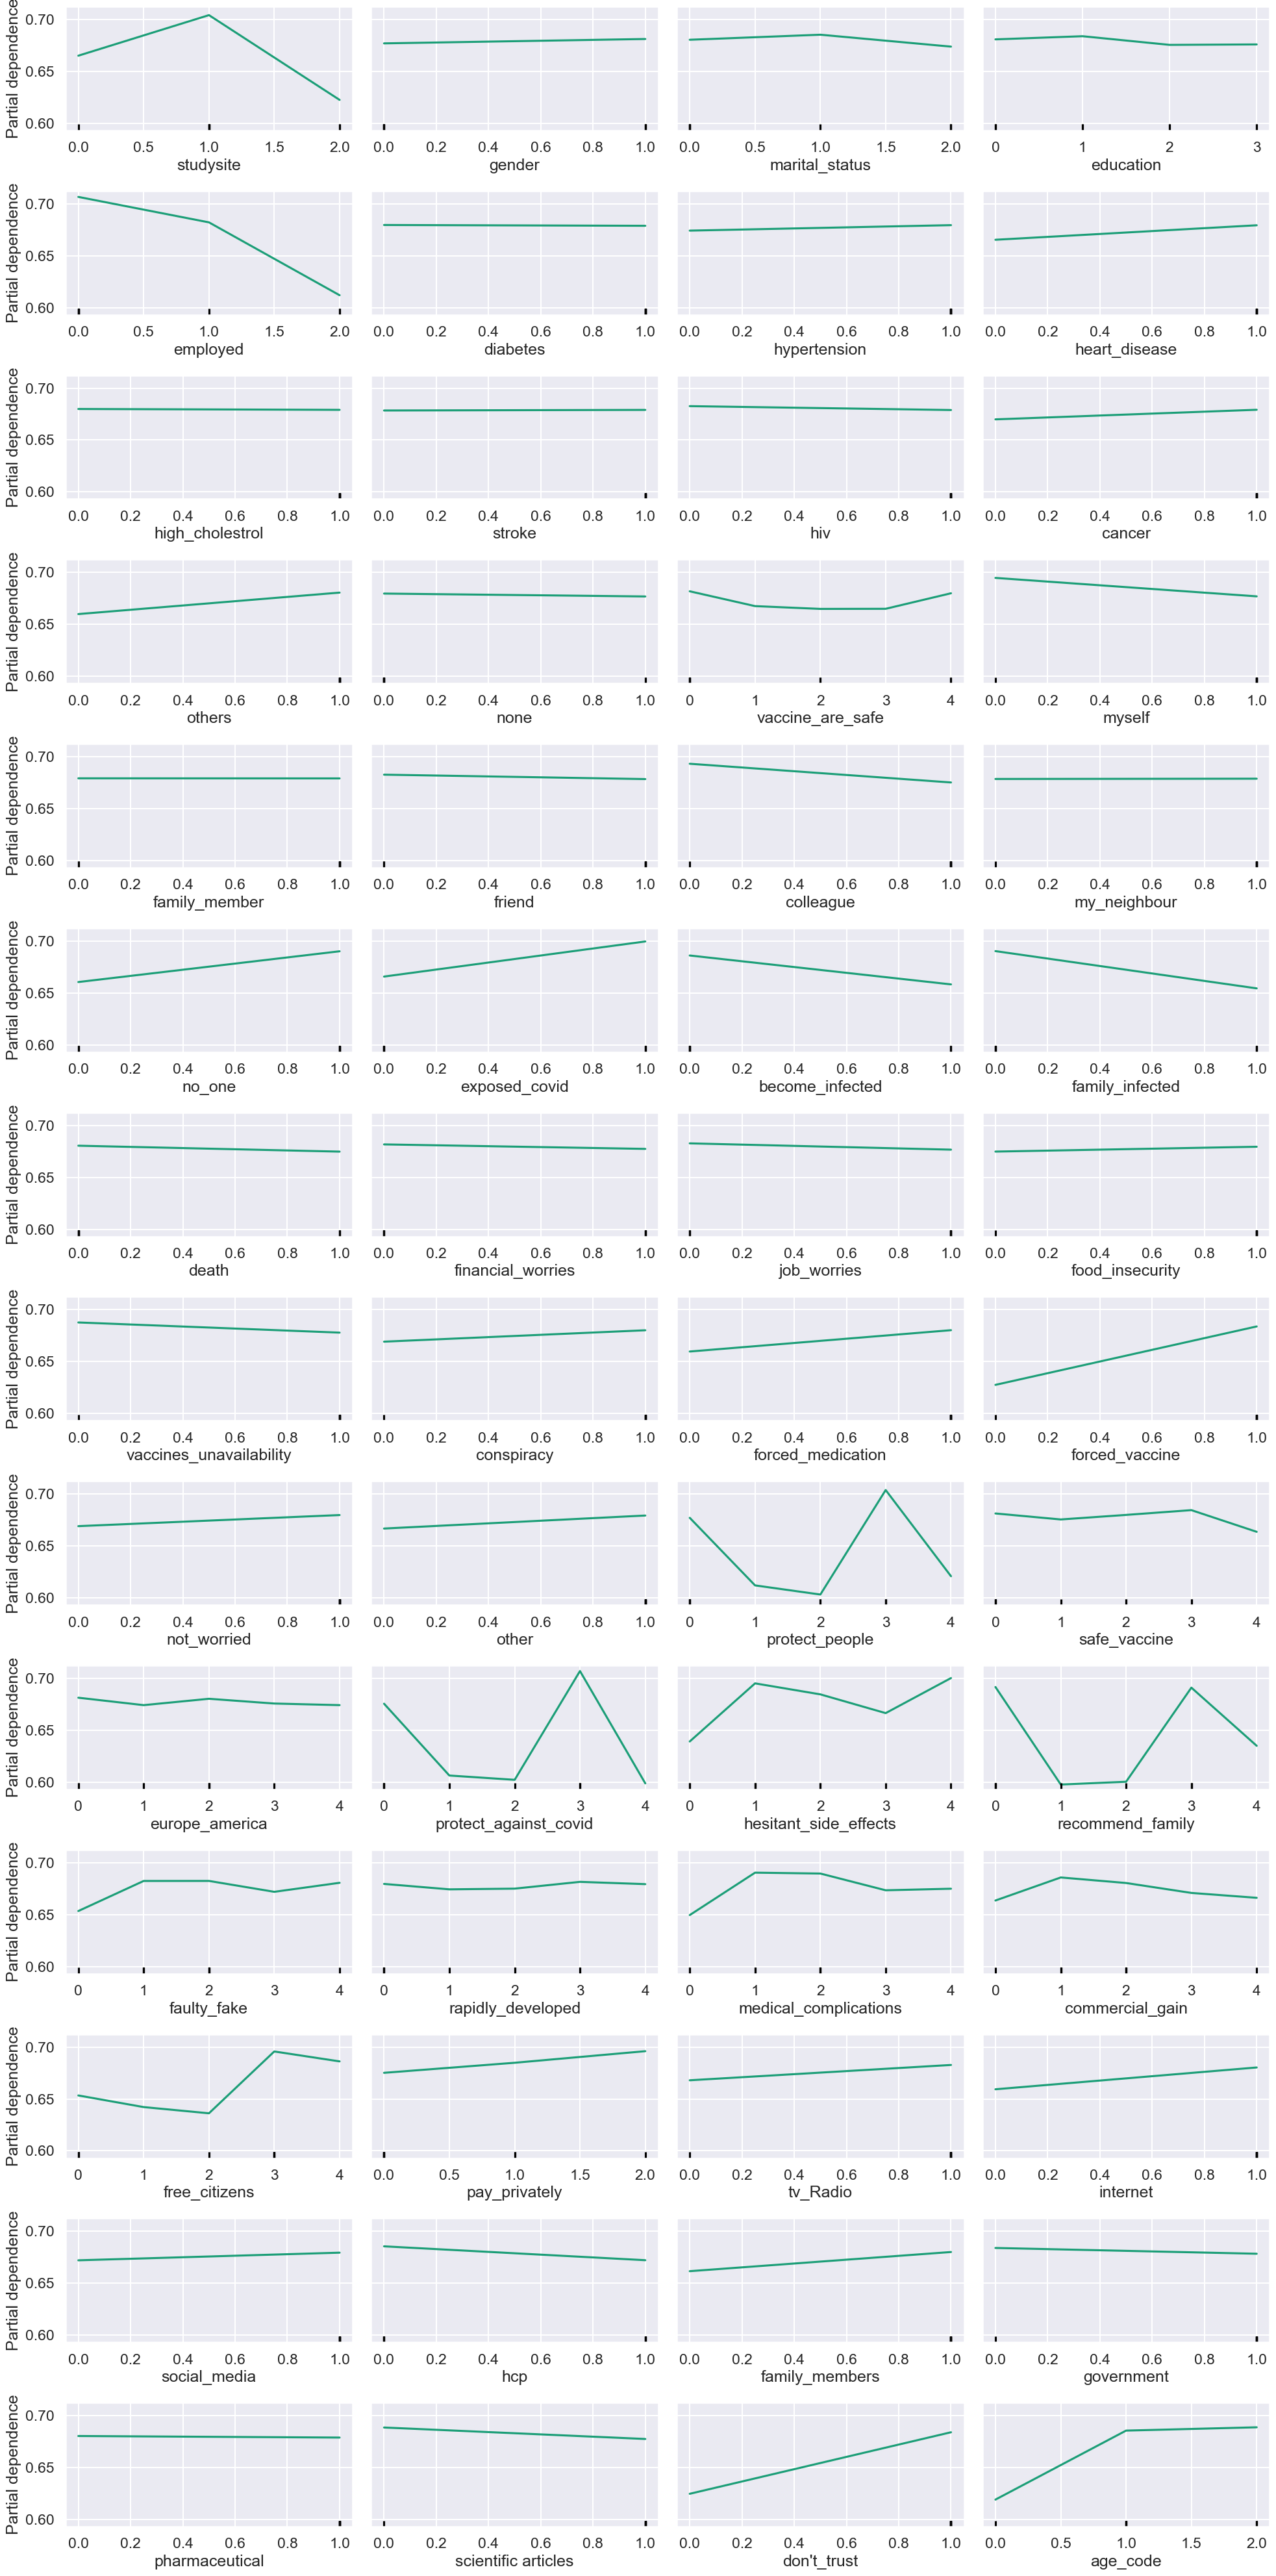

In [43]:
# plotting for all values
n_cols = 4
n_rows = int(len(X_train.columns)/n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 40))

PartialDependenceDisplay.from_estimator(RF_clf, X_train, X_train.columns, ax=ax, n_cols=n_cols)

fig.tight_layout();

# Permutation Importance (cont')
This method is model agnostic and can be used for evaluating the importance of features for both regression and classification models.

In [116]:
## Permutation Importance
from sklearn.inspection import permutation_importance

svm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=30, n_jobs=-1)

In [117]:
svm_importances_mean = svm_importance.importances_mean

In [118]:
feature_names = X.columns
for i, imp in enumerate(svm_importances_mean):
    print(f"Feature {feature_names[i]}: Importance {imp:.3f}")

Feature studysite: Importance 0.012
Feature gender: Importance -0.000
Feature marital_status: Importance 0.001
Feature education: Importance 0.001
Feature employed: Importance 0.007
Feature diabetes: Importance -0.001
Feature hypertension: Importance -0.000
Feature heart_disease: Importance -0.001
Feature high_cholestrol: Importance 0.000
Feature stroke: Importance -0.000
Feature hiv: Importance -0.001
Feature cancer: Importance -0.001
Feature others: Importance -0.000
Feature none: Importance -0.000
Feature vaccine_are_safe: Importance 0.001
Feature myself: Importance 0.005
Feature family_member: Importance -0.001
Feature friend: Importance 0.000
Feature colleague: Importance 0.001
Feature my_neighbour: Importance -0.001
Feature no_one: Importance 0.000
Feature exposed_covid: Importance 0.005
Feature become_infected: Importance 0.004
Feature family_infected: Importance 0.003
Feature death: Importance -0.003
Feature financial_worries: Importance -0.001
Feature job_worries: Importance 0

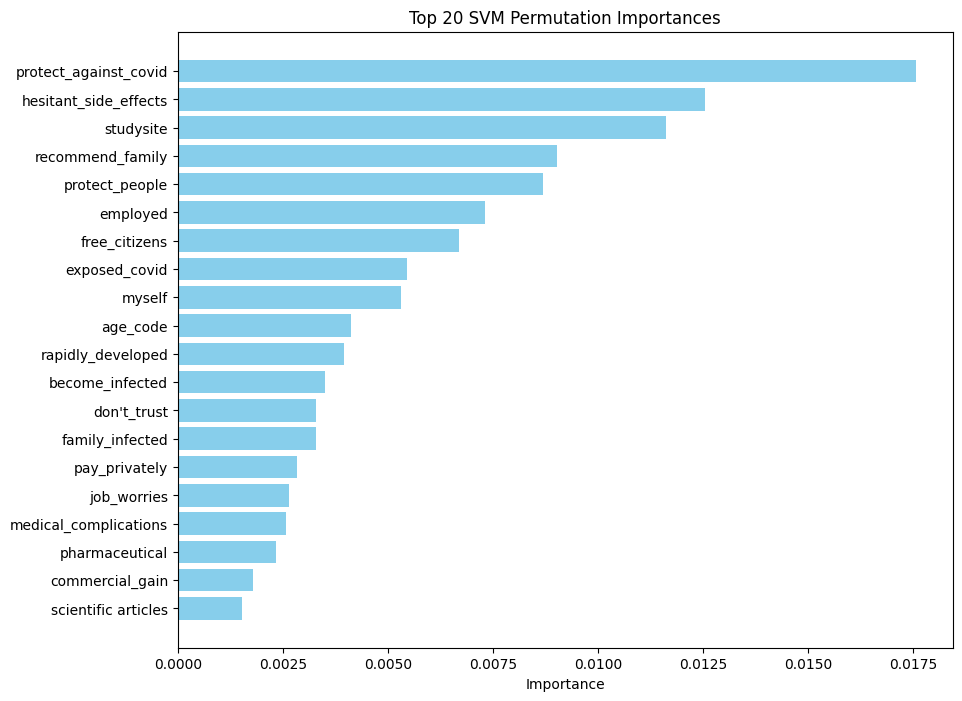

In [119]:
# Combine the importances and names into a list of tuples and sort them by importance
importances_with_names = sorted(zip(svm_importances_mean, feature_names), key=lambda x: x[0])

# Select the top 20 features (or all features if there are fewer than 20)
top_20_features = importances_with_names[-20:]

# Separate the importances and names into two lists
top_20_importances, top_20_names = zip(*top_20_features)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(20), top_20_importances, align='center', color='skyblue')
plt.yticks(range(20), top_20_names)
plt.xlabel('Importance')
plt.title('Top 20 SVM Permutation Importances')
plt.show()

In [78]:
# Permutation Impportance for XGboost

xgb_importance = permutation_importance(xgb_clf, X_test, y_test, n_repeats=30, n_jobs=-1)
xgb_importances_mean = xgb_importance.importances_mean

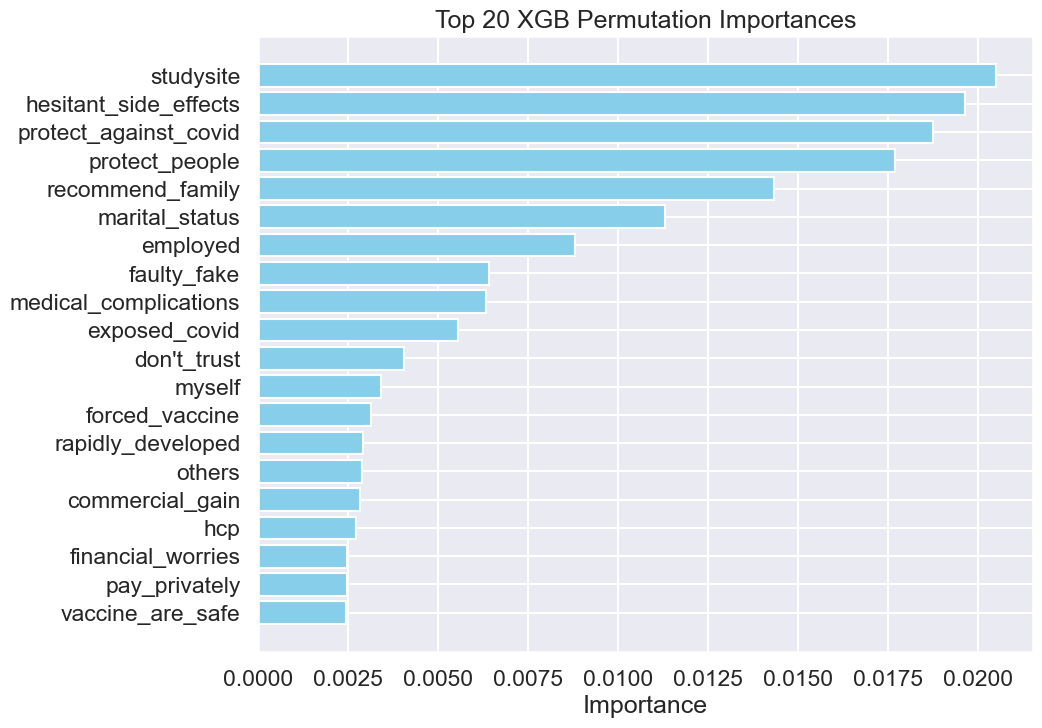

In [79]:
xgb_feature_names = X.columns

# Combine the importances and names into a list of tuples and sort them by importance
xgb_importances_with_names = sorted(zip(xgb_importances_mean, xgb_feature_names), key=lambda x: x[0])

# Select the top 20 features (or all features if there are fewer than 20)
xgb_top_20_features = xgb_importances_with_names[-20:]

# Separate the importances and names into two lists
xgb_top_20_importances, xgb_top_20_names = zip(*xgb_top_20_features)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(20), xgb_top_20_importances, align='center', color='skyblue')
plt.yticks(range(20), xgb_top_20_names)
plt.xlabel('Importance')
plt.title('Top 20 XGB Permutation Importances')
plt.show()

# PDPs for Multiple Models

In [97]:
# compare PDPs for highly ranking Permutation Feature Importance
# RE-run for each variable

# We've isolated 4 other variables that we'd like to look at their PDP


var_2 = 'recommend_family'
var_3 = 'protect_people'
var_4 = 'studysite'
var_5 = 'exposed_covid'


values_2 = X_train[var_2].sort_values().unique()
values_3 = X_train[var_3].sort_values().unique()
values_4 = X_train[var_4].sort_values().unique()
values_5 = X_train[var_5].sort_values().unique()


# protect against covid
# protect_against_covid_df = pd.DataFrame(columns=values)

# protect_against_covid_df.loc['RF_clf'] = partial_dependence(RF_clf, X_train, var, kind='average')['average'][0]
# protect_against_covid_df.loc['SVM_clf'] = partial_dependence(svm_clf, X_train, var, kind='average')['average'][0]
# protect_against_covid_df.loc['XGB_clf'] = partial_dependence(xgb_clf, X_train, var, kind='average')['average'][0]

# recommend_family
# recommend_family_df = pd.DataFrame(columns=values)

# recommend_family_df.loc['RF_clf'] = partial_dependence(RF_clf, X_train, var_2, kind='average')['average'][0]
# recommend_family_df.loc['SVM_clf'] = partial_dependence(svm_clf, X_train, var_2, kind='average')['average'][0]
# recommend_family_df.loc['XGB_clf'] = partial_dependence(xgb_clf, X_train, var_2, kind='average')['average'][0]

# protect_people
# protect_people_df = pd.DataFrame(columns=values)

# protect_people_df.loc['RF_clf'] = partial_dependence(RF_clf, X_train, var_3, kind='average')['average'][0]
# protect_people_df.loc['SVM_clf'] = partial_dependence(svm_clf, X_train, var_3, kind='average')['average'][0]
# protect_people_df.loc['XGB_clf'] = partial_dependence(xgb_clf, X_train, var_3, kind='average')['average'][0]

# # studysite
# studysite_df = pd.DataFrame(columns=values_4)

# studysite_df.loc['RF_clf'] = partial_dependence(RF_clf, X_train, var_4, kind='average')['average'][0]
# studysite_df.loc['svm_clf'] = partial_dependence(svm_clf, X_train, var_4, kind='average')['average'][0]
# studysite_df.loc['xgb_clf'] = partial_dependence(xgb_clf, X_train, var_4, kind='average')['average'][0]

# # exposed_covid
exposed_covid_df = pd.DataFrame(columns=values_5)

exposed_covid_df.loc['RF_clf'] = partial_dependence(RF_clf, X_train, var_5, kind='average')['average'][0]
exposed_covid_df.loc['svm_clf'] = partial_dependence(svm_clf, X_train, var_5, kind='average')['average'][0]
exposed_covid_df.loc['xgb_clf'] = partial_dependence(xgb_clf, X_train, var_5, kind='average')['average'][0]


In [88]:
# visualize each table
# protect_against_covid_df
# recommend_family_df
# protect_people_df
# studysite_df
# exposed_covid_df

0         1         2         3         4
RF_clf   0.691707  0.597775  0.600442  0.691089  0.635065
SVM_clf  0.703575  0.635688  0.615027  0.644606  0.713319
XGB_clf  0.700281  0.596362  0.630527  0.698437  0.655692

In [98]:
# pa_covid = protect_against_covid_df.reset_index().melt('index')
# pa_covid = recommend_family_df.reset_index().melt('index')
# pa_covid = protect_people_df.reset_index().melt('index')
# pa_covid = studysite_df.reset_index().melt('index')
pa_covid = exposed_covid_df.reset_index().melt('index')

# # dictionary with the mapping of old names to new names
# mapping = {0: 1, 1: 3, 2: 2, 3:0, 4:4}

# # Use the map function to apply the renaming
# pa_covid['variable'] = pa_covid['variable'].map(mapping)
# pa_covid


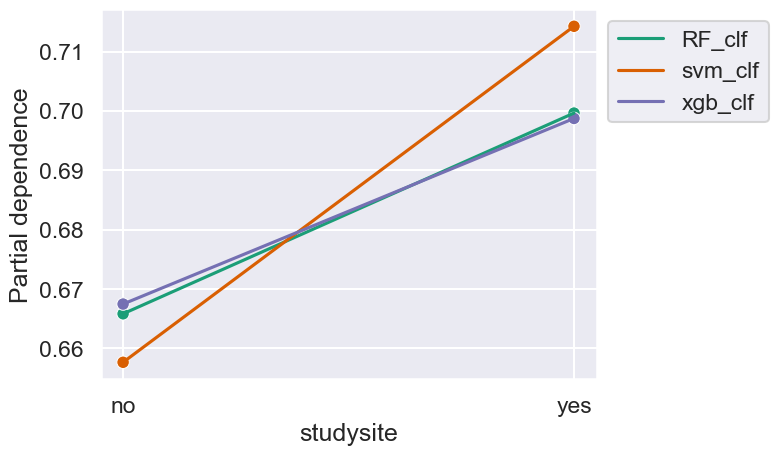

In [100]:
sns.lineplot(data=pa_covid, x='variable', y='value', hue='index');
sns.scatterplot(data=pa_covid, x='variable', y='value', hue='index', legend=False)

plt.legend(loc='upper right',bbox_to_anchor=(1.37, 1))
plt.ylabel("Partial dependence")
# labelez = ['strongly_agree', 'agree', 'neutral', 'disagree', 'strongly_disagree']
# site_lables = ['Faith based','Private based', 'Public based']
yes_no = ['no','yes']
plt.xticks(ticks=[0,1], labels=yes_no, rotation=0);
plt.xlabel(var_4);
# plt.savefig("PDP_study_site")

- Feature importance is often specific to certain models. It measures the increase in the model's prediction error when the feature's information is altered (or removed). The exact calculation of feature importance can vary depending on the model type.  
- Permutation importance is model agnostic, meaning it can be used with any model. It assesses the importance of a feature by calculating the increase in the model's prediction error after permuting the feature, thus breaking the relationship between the feature and the outcome. It doesn't rely on the model internals.

# let's compare all variables across the 3 models


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bun

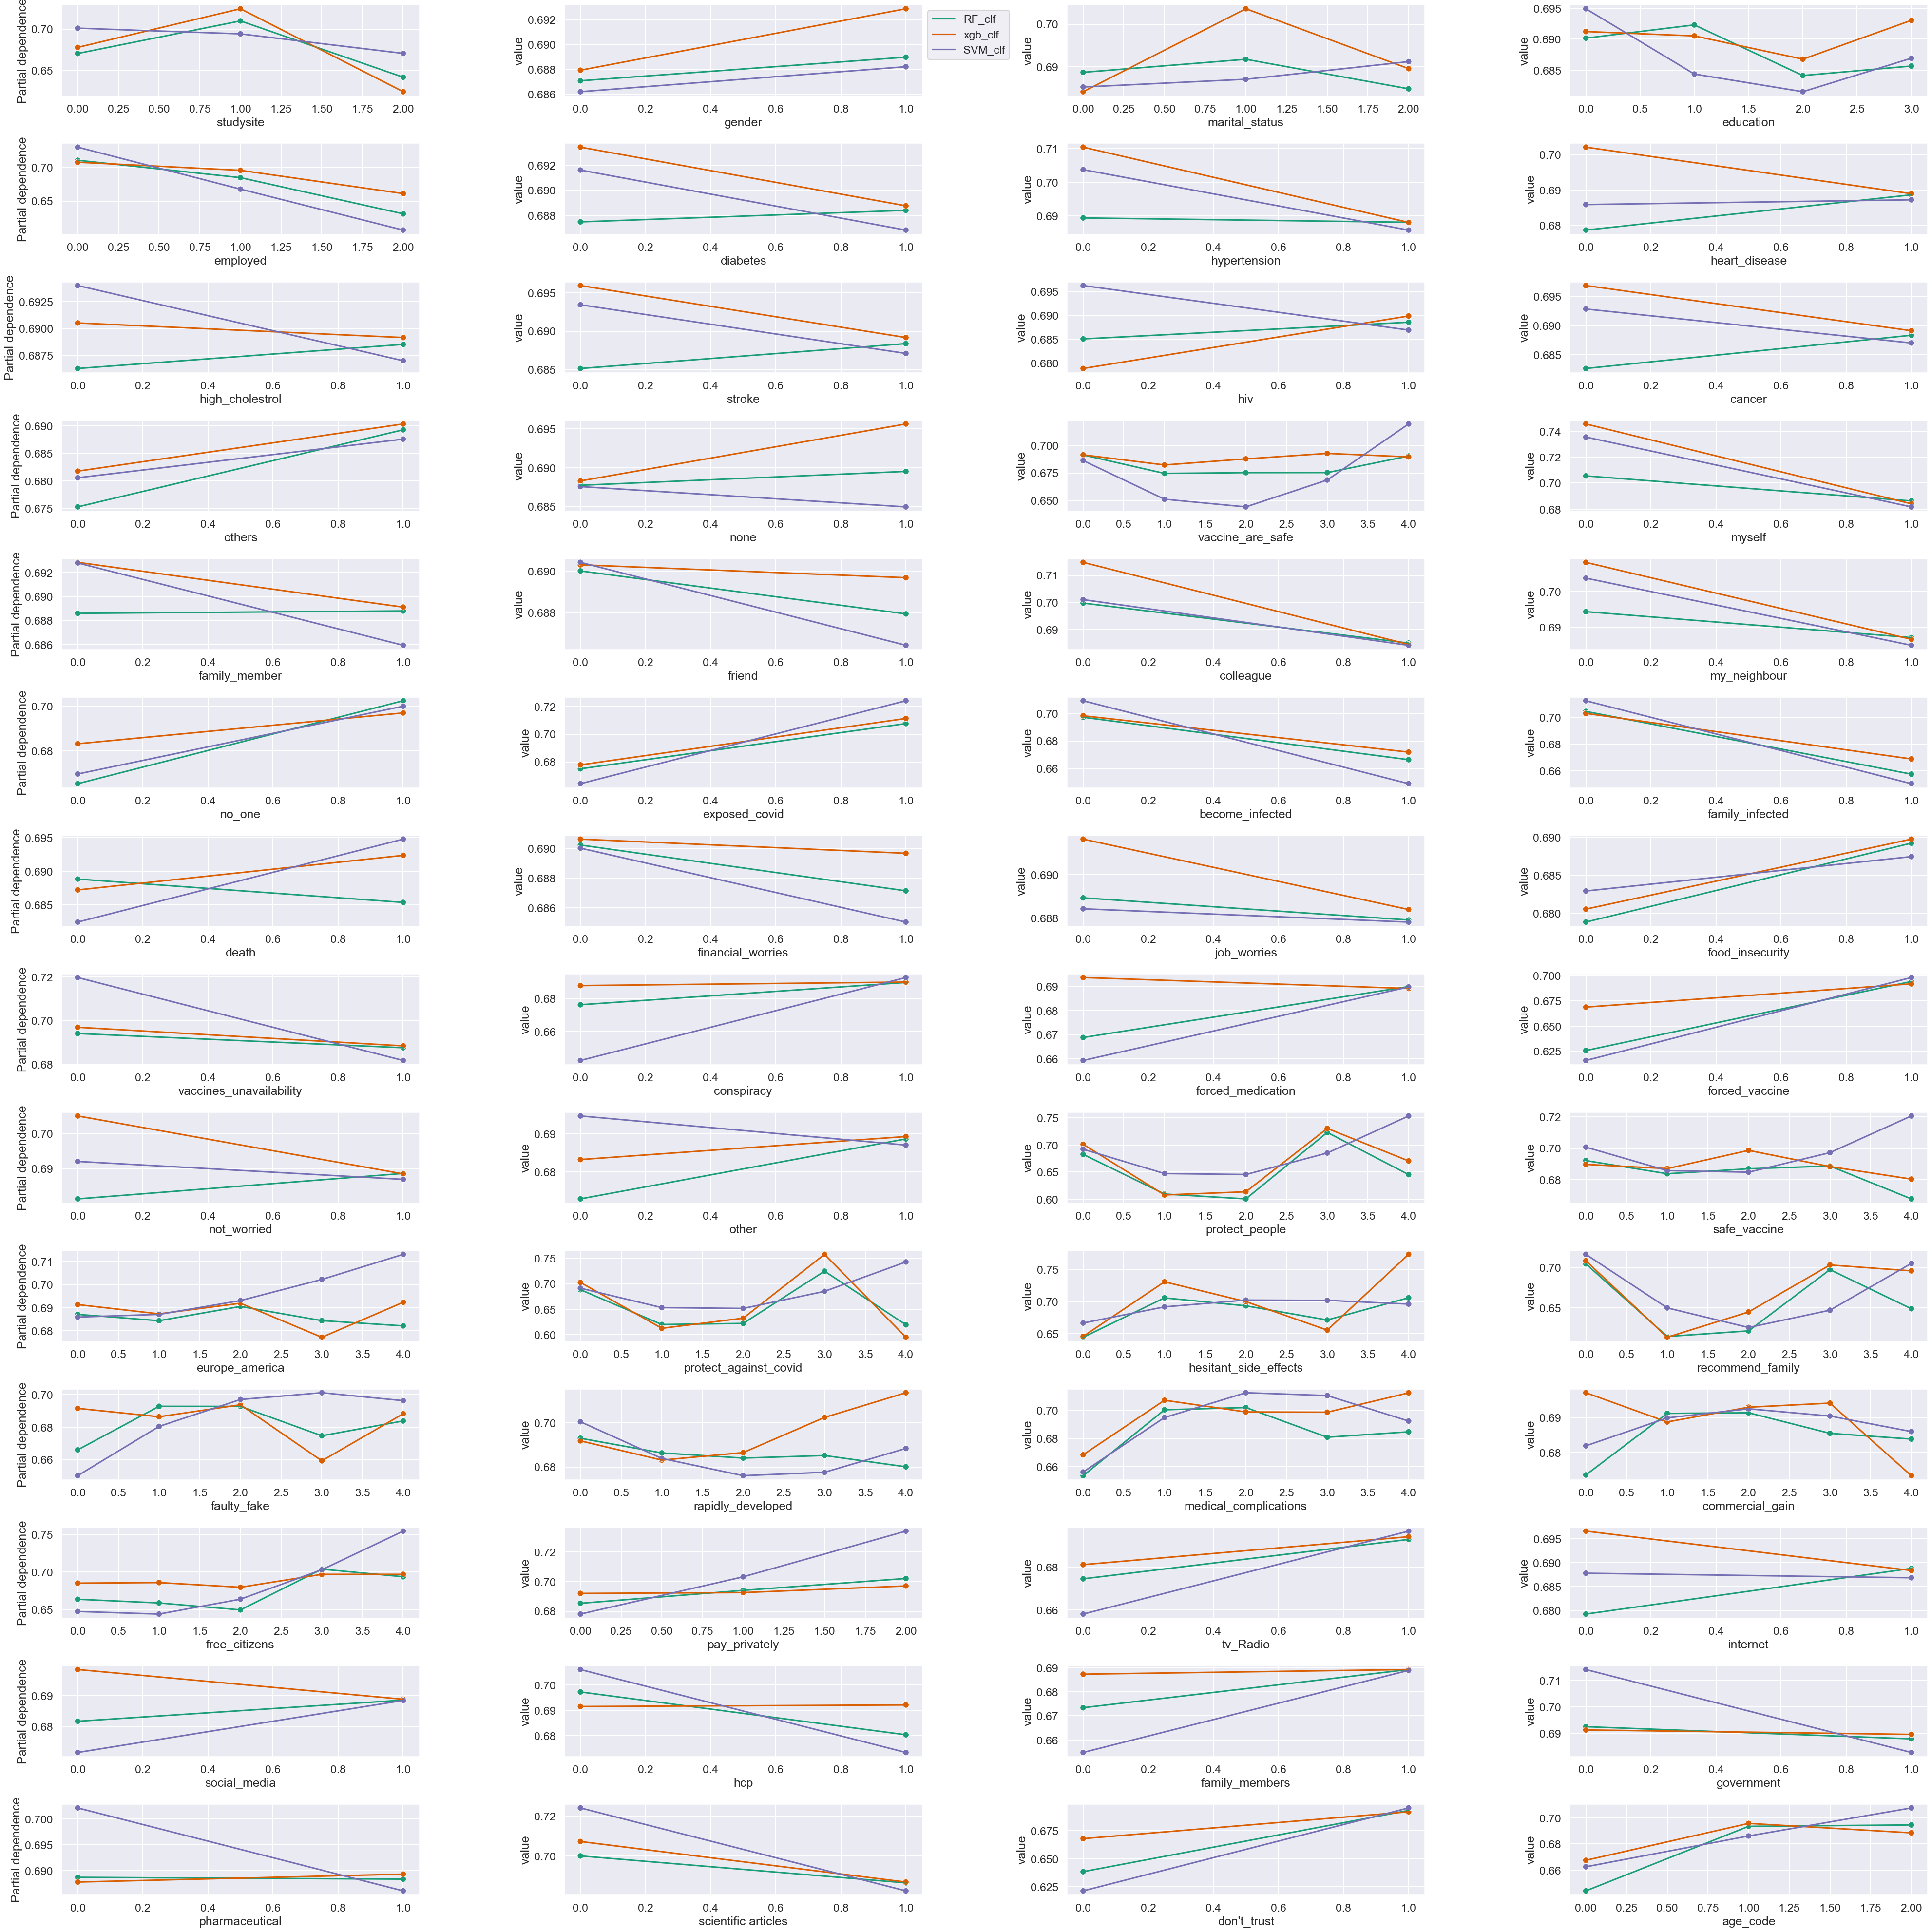

In [50]:
summary = {}  # create an empty dictionary
fig, ax = plt.subplots(n_rows, n_cols, figsize=(40,40))


for i, x in enumerate(X_train.columns):
    
    summary[x] = pd.DataFrame(columns=values)

    raw_values = partial_dependence(RF_clf, X_train, x, kind='average')
    
    summary[x] = pd.DataFrame(columns=raw_values['values'][0])

    summary[x].loc['RF_clf'] = raw_values['average'][0]

    summary[x].loc['xgb_clf'] = partial_dependence(xgb_clf, X_train, x, kind='average')['average'][0]

    summary[x].loc['SVM_clf'] = partial_dependence(svm_clf, X_train, x, kind='average')['average'][0]
    
    data = summary[x].reset_index().melt('index')

    loc = i//n_cols, i%n_cols
    
    if i==1:
        sns.lineplot(data=data, x='variable', y='value', 
                     hue='index',ax=ax[loc]);
        ax[loc].legend(bbox_to_anchor=(1, 1));
    else: 
        sns.lineplot(data=data, x='variable', y='value', 
                     hue='index', ax=ax[loc], legend=False);
    sns.scatterplot(data=data, x='variable', y='value', 
                    hue='index', ax=ax[loc], legend=False)
    ax[loc].set_xlabel(x)
    if i%n_cols==0:
        ax[loc].set_ylabel('Partial dependence')


fig.tight_layout()


In [215]:
# Stacking

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Define the base learners
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Define the meta-learner
meta_learner = svm.SVC()

# Build the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Model Accuracy: {accuracy:.2f}')


Stacking Model Accuracy: 0.79


- Feature importance is often specific to certain models. It measures the increase in the model's prediction error when the feature's information is altered (or removed). The exact calculation of feature importance can vary depending on the model type.  
- Permutation importance is model agnostic, meaning it can be used with any model. It assesses the importance of a feature by calculating the increase in the model's prediction error after permuting the feature, thus breaking the relationship between the feature and the outcome. It doesn't rely on the model internals.